# Bildverarbeitung Evaluation

In [1]:
# import ImageHandler as ih
# from ImageHandler import cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
csvFile = 'extracsvAll.csv'
test_df = pd.read_csv(csvFile)

In [3]:
test_df.head()

,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner,type
0,26,0.004413,0.379250,1.003808,3,65806,434,254.011059,-2.810088,2.710155,1.045454,-8.246211,1.020743,0.554420,0.970142,0.669933,0.978365,5.099020,Dosenoeffner
1,27,0.062218,0.442046,1.073125,2,29660,432,240.198330,-0.998737,2.002529,1.673469,24.331050,1.249528,0.650614,0.954057,0.499288,0.978225,30.232433,Korkenzieher
2,20,0.109854,0.498771,1.251264,2,7145,418,228.538098,7.272945,3.037383,1.585366,23.769729,1.516755,0.910871,0.951853,0.739691,0.964045,16.278821,Flaschenoeffner
3,20,0.013830,0.253412,1.522871,3,27976,322,249.384412,7.473587,1.616767,1.802632,-0.000000,0.277719,0.761132,0.958875,0.718056,0.963532,17.720045,Dosenoeffner
4,19,0.008913,0.401001,1.051924,2,56244,407,252.974080,4.510240,2.314801,1.208333,-7.615773,1.008971,0.670125,0.964847,0.648434,0.975986,19.235384,Dosenoeffner


In [4]:
test_df.describe()

,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,20.945479,0.250186,0.379473,1.141619,4.033245,24313.871011,408.986702,236.061220,20.118545,2.515270,2.379567,39.536727,1.038357,0.778321,0.893803,0.691337,0.848547,22.186489
std,7.038676,0.363307,0.157934,0.267939,3.935933,22626.428209,63.781041,21.161172,57.418297,1.084067,2.035359,61.337702,0.498986,0.138587,0.106376,0.177150,0.179894,20.604134
min,4.000000,0.000291,0.015558,0.605768,1.000000,0.000000,180.000000,132.730945,-32.464400,1.000000,1.000000,-36.400549,0.075527,0.298228,0.435686,0.278405,0.112315,0.000000
25%,17.000000,0.031198,0.295845,0.986322,2.000000,7860.750000,384.750000,227.936896,0.263748,1.657645,1.415874,7.778175,0.735257,0.658373,0.879219,0.577773,0.818046,7.810250
50%,21.000000,0.077850,0.388052,1.104482,3.000000,18001.500000,425.000000,241.121008,6.468045,2.376068,1.756980,29.008618,1.040780,0.783725,0.943555,0.693842,0.927701,16.763055
75%,26.000000,0.196946,0.482143,1.262304,5.000000,35320.000000,445.000000,252.284380,15.281609,3.079847,2.547989,44.102154,1.357889,0.903646,0.958875,0.814004,0.971799,27.266971
max,44.000000,1.000000,0.846259,2.501068,31.000000,156931.000000,539.000000,255.000000,299.000000,7.932414,26.000000,299.000000,2.825753,1.000000,1.000000,1.000000,1.000000,108.461975


In [5]:
test_df.shape #anzahl Datensätze udn Spalten

(752, 19)

Scatterplot von 2 Merkmalen um Klassifikation zu beurteilen

Text(0, 0.5, 'contureDistance')

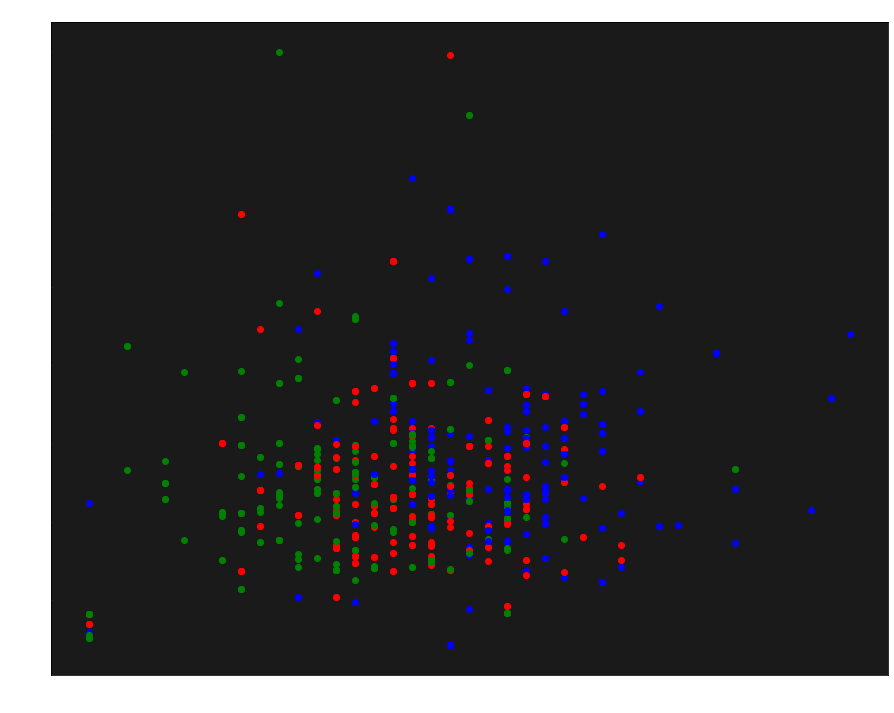

In [6]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

fig, ax = plt.subplots(figsize=(15,12)) #Größe Plot  konfigurieren

for i  in range(len(test_df['type'])):
    ax.scatter(test_df['approxAnzahl'][i],
               test_df['contureDistance'][i],
               #test_df['circleLike'][i],
               color=colors[test_df['type'][i]])
    #circleLike 	contureDistance
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_facecolor((0.1,0.1,0.1))

ax.set_title('VDKI Daten')
ax.set_xlabel('approxAnzahl')
ax.set_ylabel('contureDistance')

Text(0, 0.5, 'contureDistance')

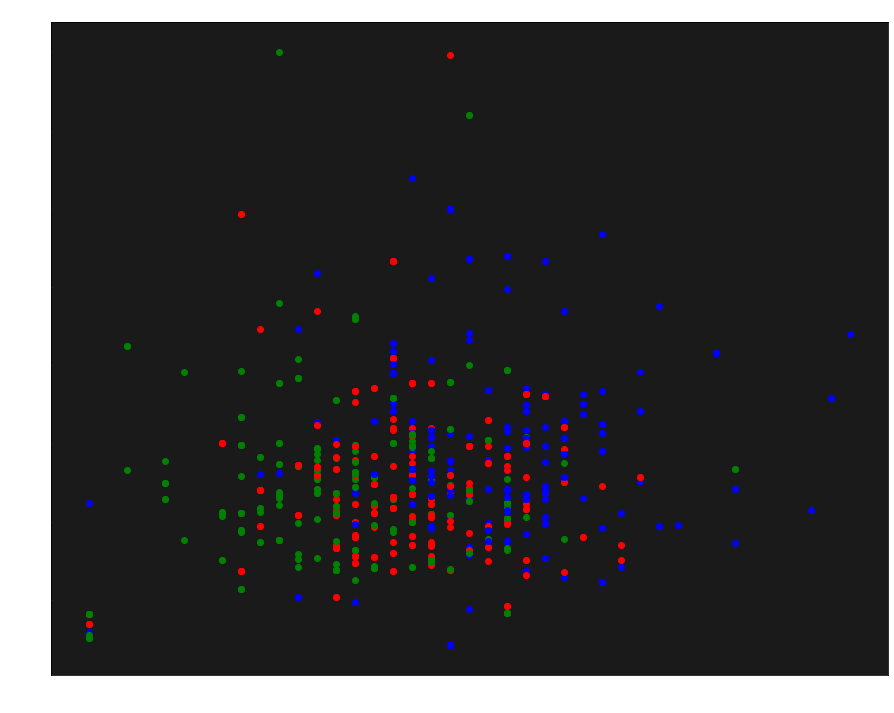

In [7]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

fig, ax = plt.subplots(figsize=(15,12)) #Größe Plot  konfigurieren

for i  in range(len(test_df['type'])):
    ax.scatter(test_df['approxAnzahl'][i],
               test_df['contureDistance'][i],
               #test_df['circleLike'][i],
               color=colors[test_df['type'][i]])
    #circleLike 	contureDistance
    
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_facecolor((0.1,0.1,0.1))

ax.set_title('VDKI Daten')
ax.set_xlabel('approxAnzahl')
ax.set_ylabel('contureDistance')	

Text(0, 0.5, 'farPoint')

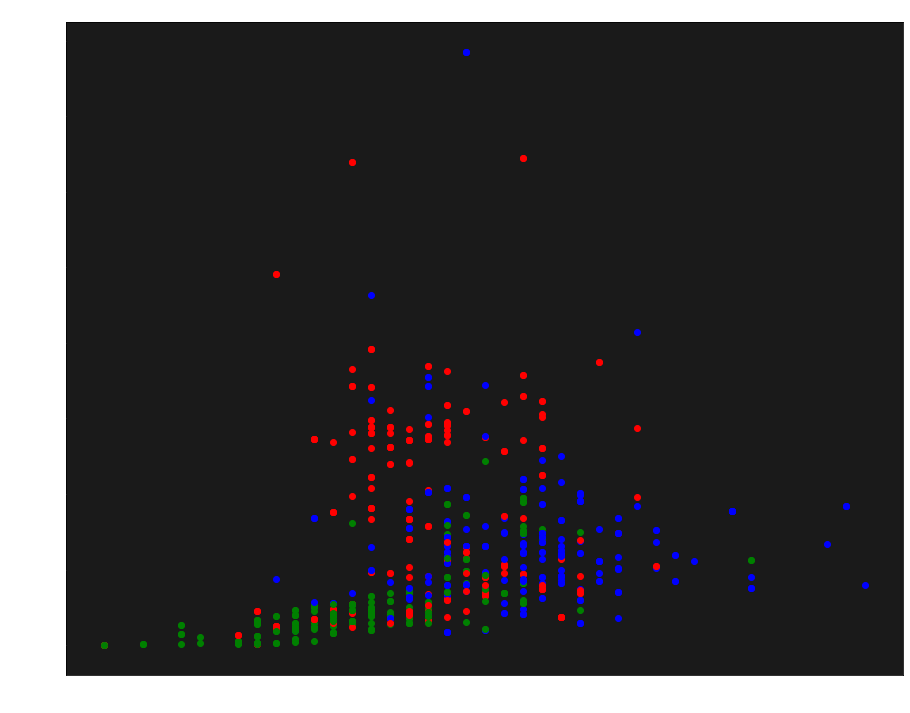

In [8]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

fig, ax = plt.subplots(figsize=(15,12)) #Größe Plot  konfigurieren

for i  in range(len(test_df['type'])):
    ax.scatter(test_df['approxAnzahl'][i],
               #test_df['contureDistance'][i],
               test_df['farPoint'][i],
               color=colors[test_df['type'][i]])
    
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_facecolor((0.1,0.1,0.1))

ax.set_title('VDKI Daten')
ax.set_xlabel('approxAnzahl')
ax.set_ylabel('farPoint')

Text(0, 0.5, 'farPoint')

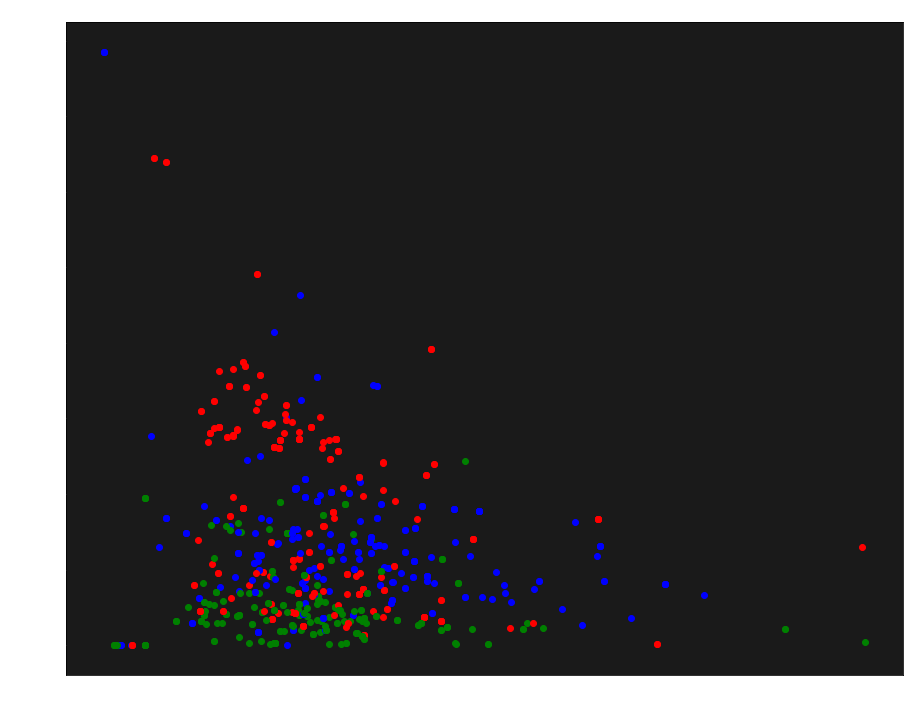

In [9]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

fig, ax = plt.subplots(figsize=(15,12)) #Größe Plot  konfigurieren

for i  in range(len(test_df['type'])):
    ax.scatter(test_df['contureDistance'][i],
               #test_df['contureDistance'][i],
               test_df['farPoint'][i],
               color=colors[test_df['type'][i]])
    
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_facecolor((0.1,0.1,0.1))

ax.set_title('VDKI Daten')
ax.set_xlabel('contureDistance')
ax.set_ylabel('farPoint')

Klassen statt mit Namen mit Zahlen bezeichnen

Text(0, 0.5, 'minimal_ratio')

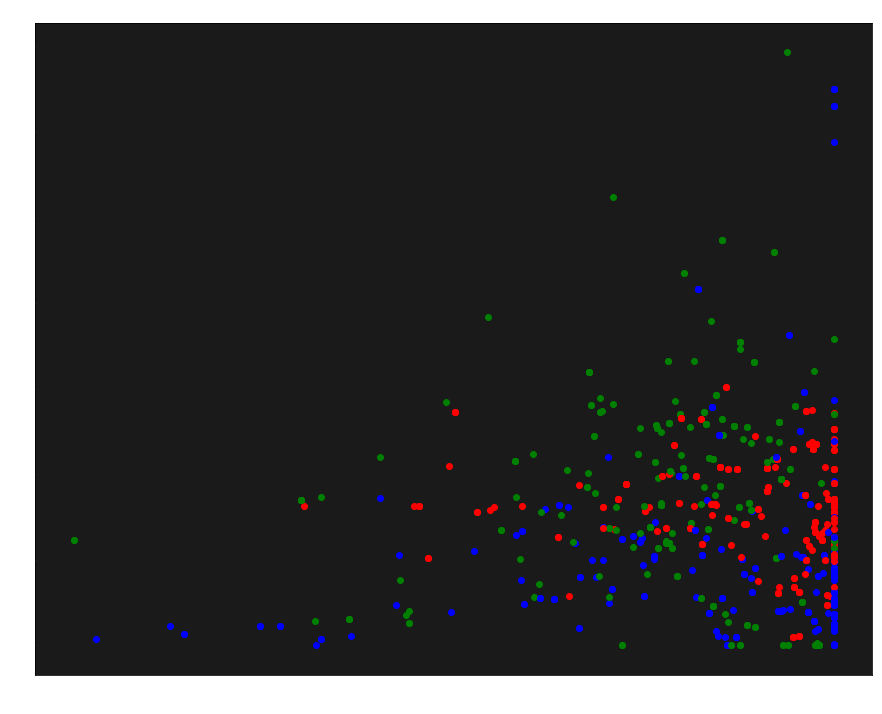

In [10]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

fig, ax = plt.subplots(figsize=(15,12)) #Größe Plot  konfigurieren

for i  in range(len(test_df['type'])):
    ax.scatter(test_df['mean_val'][i],
               test_df['minimal_ratio'][i],
               #test_df['farPoint'][i],
               color=colors[test_df['type'][i]])
    
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_facecolor((0.1,0.1,0.1))

ax.set_title('VDKI Daten')
ax.set_xlabel('mean_val')
ax.set_ylabel('minimal_ratio')

Text(0, 0.5, 'rectangleLike')

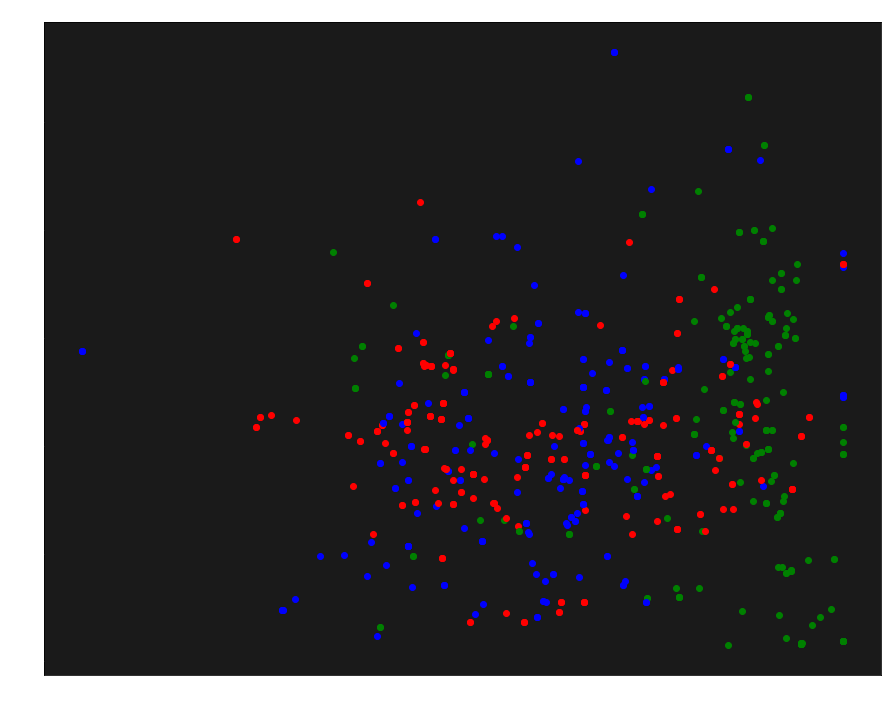

In [11]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

fig, ax = plt.subplots(figsize=(15,12)) #Größe Plot  konfigurieren

for i  in range(len(test_df['type'])):
    ax.scatter(#test_df['mean_val'][i],
               #test_df['minimal_ratio'][i],
               test_df['seradity'][i],
               test_df['rectangleLike'][i],
               color=colors[test_df['type'][i]])
 
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_facecolor((0.1,0.1,0.1))

ax.set_title('VDKI Daten')
ax.set_xlabel('seradity')
ax.set_ylabel('rectangleLike')

Text(0, 0.5, 'solidity')

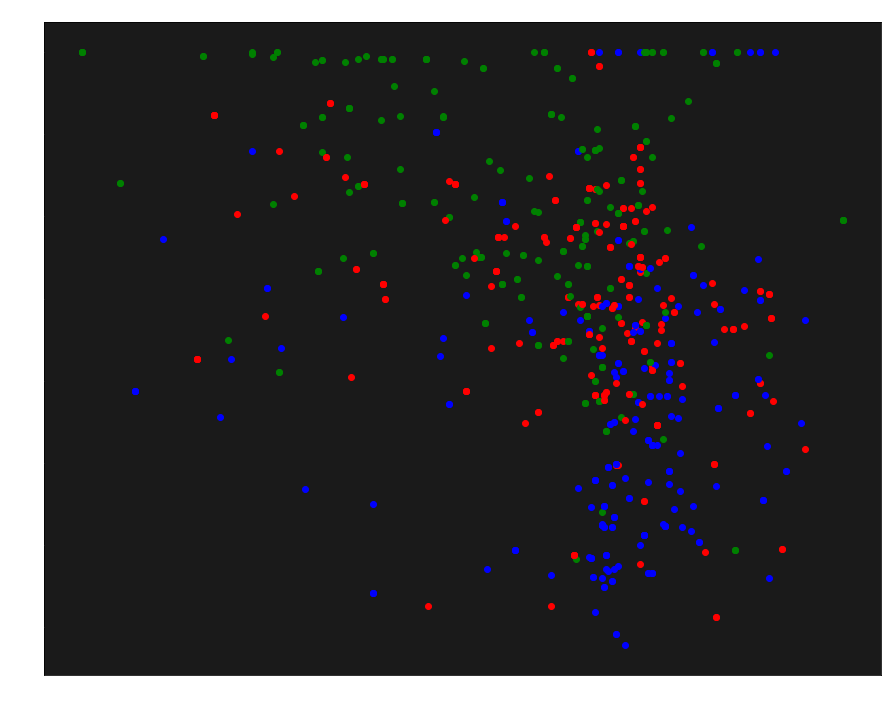

In [12]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

fig, ax = plt.subplots(figsize=(15,12)) #Größe Plot  konfigurieren

for i  in range(len(test_df['type'])):
    ax.scatter(#test_df['mean_val'][i],
               #test_df['minimal_ratio'][i],
               test_df['keyPointsAnzahl'][i],
               test_df['solidity'][i],
               color=colors[test_df['type'][i]])
 
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_facecolor((0.1,0.1,0.1))

ax.set_title('VDKI Daten')
ax.set_xlabel('keyPointsAnzahl')
ax.set_ylabel('solidity')

In [13]:
test_original_df = test_df #alten dataframe sichern

In [14]:
type_to_int ={'Dosenoeffner':0,'Flaschenoeffner':1, 'Korkenzieher':2} # Für jede Klasse eindeutige Zahl setzen

test_df['type']=test_df['type'].map(type_to_int) # Klassenspalte überschreiben mit Zahlen
test_df.head()

,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner,type
0,26,0.004413,0.379250,1.003808,3,65806,434,254.011059,-2.810088,2.710155,1.045454,-8.246211,1.020743,0.554420,0.970142,0.669933,0.978365,5.099020,0
1,27,0.062218,0.442046,1.073125,2,29660,432,240.198330,-0.998737,2.002529,1.673469,24.331050,1.249528,0.650614,0.954057,0.499288,0.978225,30.232433,2
2,20,0.109854,0.498771,1.251264,2,7145,418,228.538098,7.272945,3.037383,1.585366,23.769729,1.516755,0.910871,0.951853,0.739691,0.964045,16.278821,1
3,20,0.013830,0.253412,1.522871,3,27976,322,249.384412,7.473587,1.616767,1.802632,-0.000000,0.277719,0.761132,0.958875,0.718056,0.963532,17.720045,0
4,19,0.008913,0.401001,1.051924,2,56244,407,252.974080,4.510240,2.314801,1.208333,-7.615773,1.008971,0.670125,0.964847,0.648434,0.975986,19.235384,0


Daten Visualieren, Merkmale und Kategorien

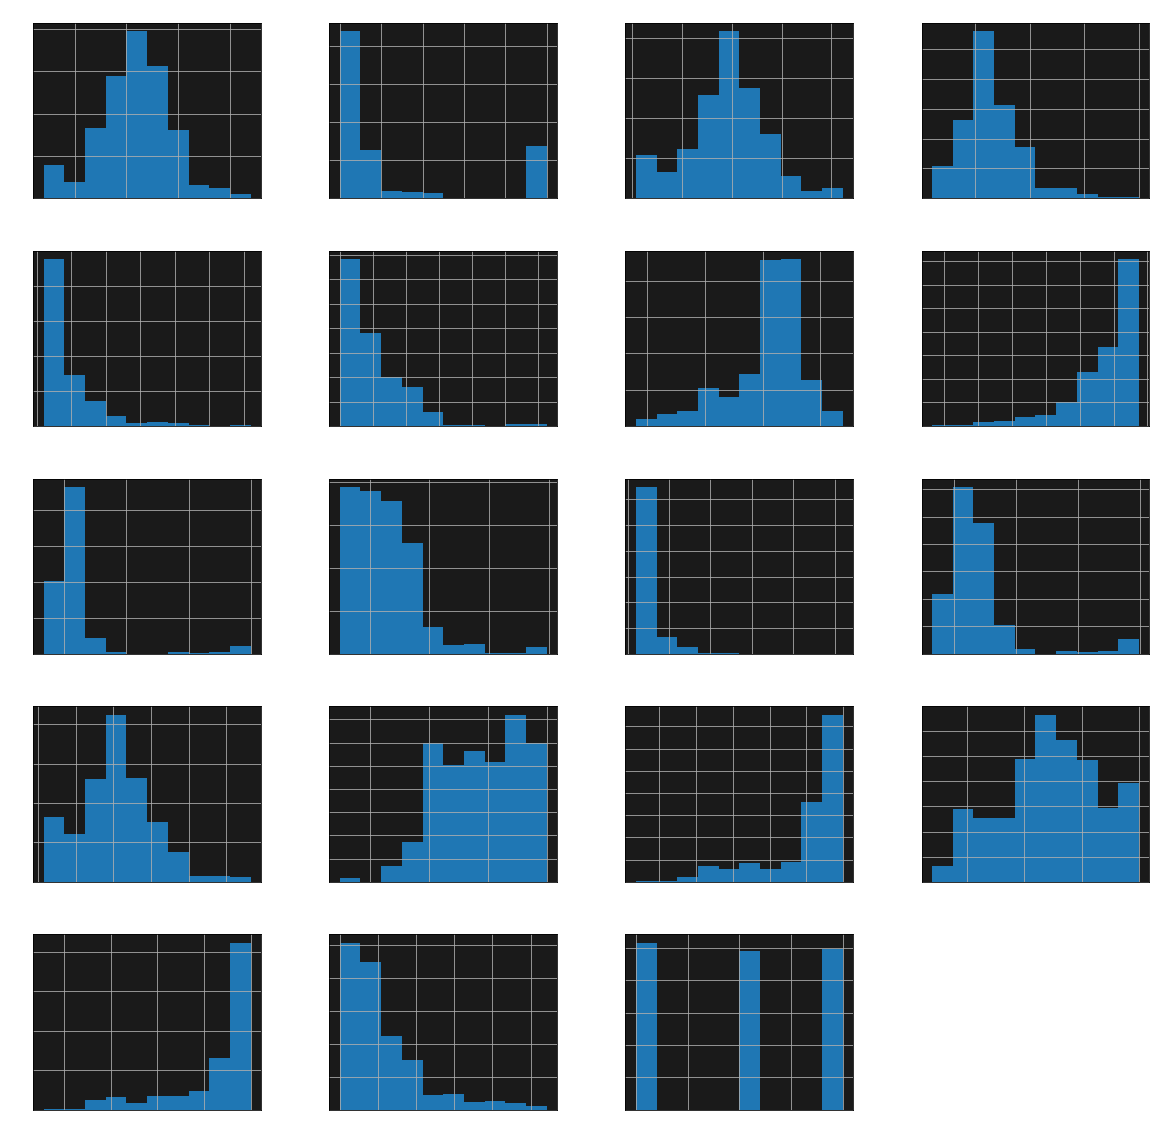

In [15]:
fig = test_df.hist(figsize=(20,20)) #berechnet Histogramme aller Spalten

for subs in fig:
    for ax in subs:
        ax.tick_params(axis='x',colors='white')
        ax.tick_params(axis='y',colors='white')
        ax.yaxis.label.set_color('white')
        ax.xaxis.label.set_color('white')
        ax.title.set_color('white')
        ax.set_facecolor((0.1,0.1,0.1))

plt.show()

Scattermatrix erstellen als schnellen Überblick

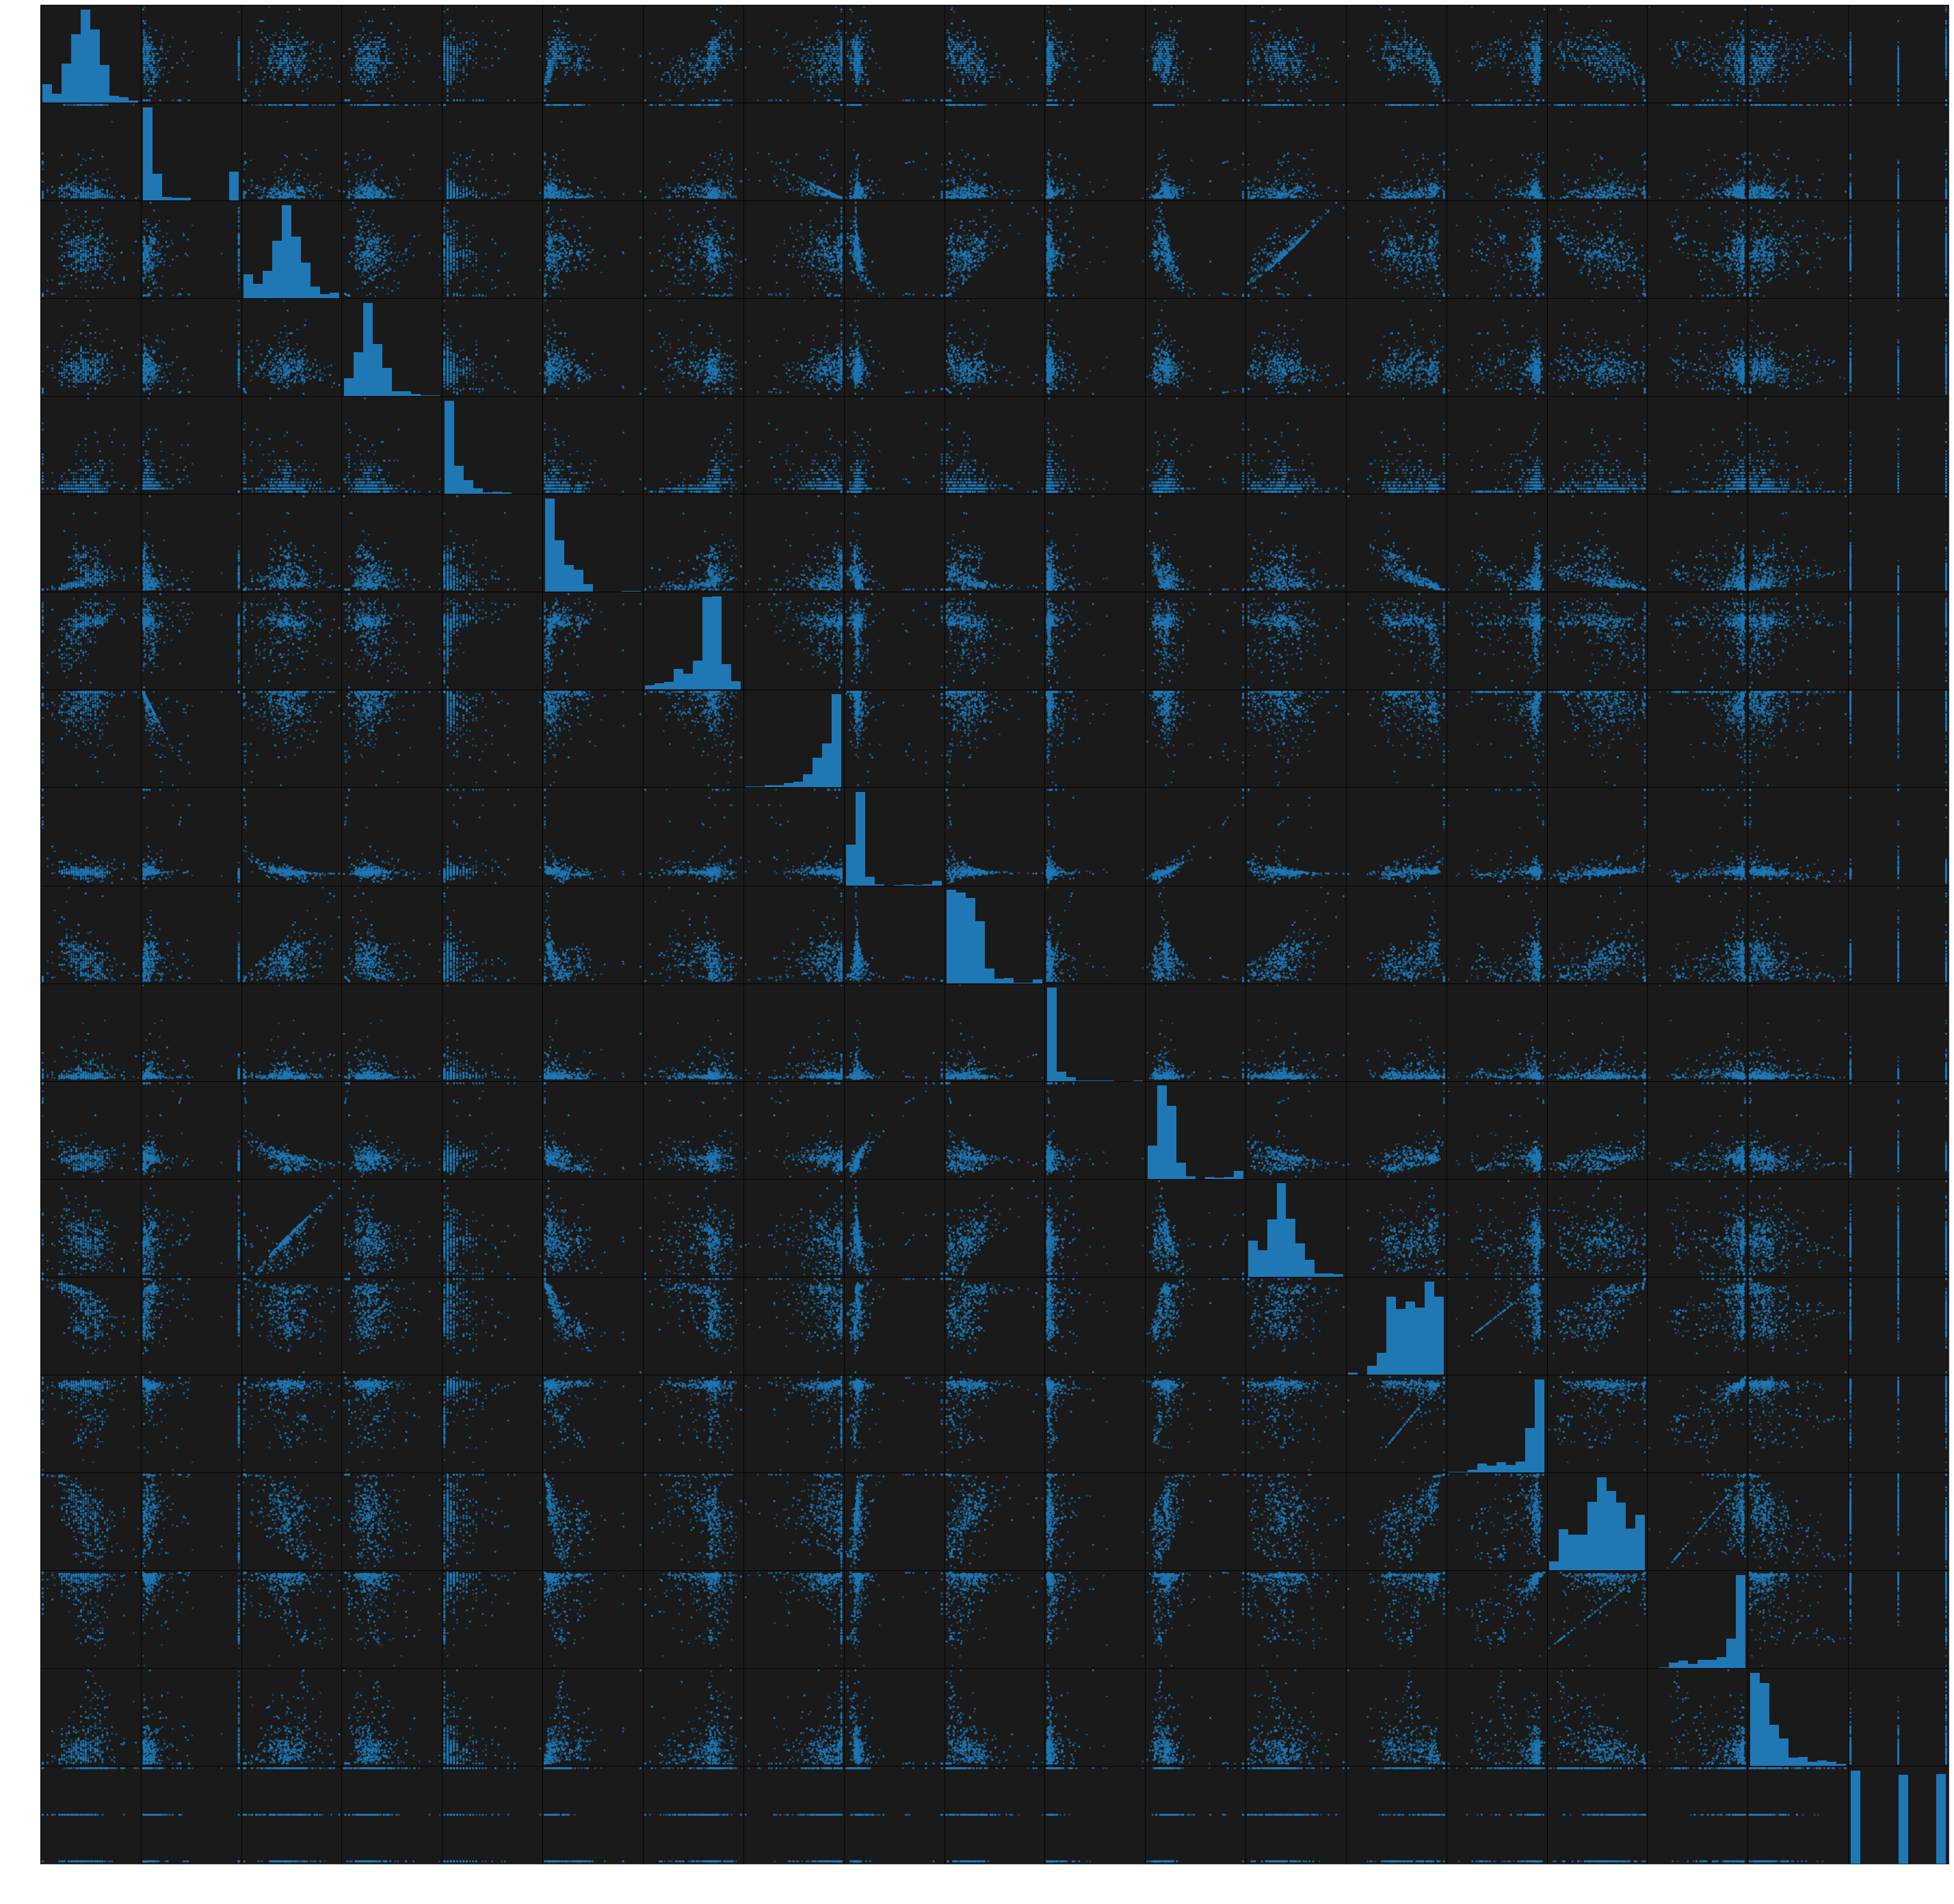

In [16]:
from pandas.plotting import scatter_matrix
fig =scatter_matrix(test_df,figsize=(50,50))
for subs in fig:
    for ax in subs:
        ax.tick_params(axis='x',colors='white')
        ax.tick_params(axis='y',colors='white')
        ax.yaxis.label.set_color('white')
        ax.xaxis.label.set_color('white')
        ax.title.set_color('white')
        ax.set_facecolor((0.1,0.1,0.1))

plt.show()

In [17]:
X = test_df.iloc[:,:-1] #alles außer letzter Spalte
y = test_df.iloc[:,-1] #nur letzte Spalte
print('X: ',X.shape, ' y: ',y.shape)

X:  (752, 18)  y:  (752,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print('X_train: ', X_train.shape, ' y_train: ',y_train.shape)
print('X_test: ', X_test.shape, ' y_test: ', y_test.shape)

X_train:  (601, 18)  y_train:  (601,)
X_test:  (151, 18)  y_test:  (151,)


Bayes Klassifikator

In [19]:
from sklearn.naive_bayes import GaussianNB # importiere Bayes-Klassifikator
from sklearn.metrics import classification_report

bayes_clf = GaussianNB()
bayes_clf.fit(X_train,y_train) #Wende Klassifikator auf Trainingsdaten an

y_pred_bayes = bayes_clf.predict(X_test) #nimm Testdaten als Vorhersagedaten

print('Accuracy Bayes: ', bayes_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred_bayes))

Accuracy Bayes:  0.6754966887417219
              precision    recall  f1-score   support

           0       0.56      0.85      0.68        52
           1       0.81      0.75      0.78        40
           2       0.78      0.47      0.59        59

    accuracy                           0.68       151
   macro avg       0.72      0.69      0.68       151
weighted avg       0.71      0.68      0.67       151



Entscheidungsbaum

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test) 

print('Accuracy Decision Tree', tree_clf.score(X_test,y_test)) # Accuracy nach Generalisierung
print('Accuracy:', accuracy_score(y_test,y_pred_tree)) #Vergleich Prädiktion mit Test
print(classification_report(y_test, y_pred_tree))

Accuracy Decision Tree 0.9470198675496688
Accuracy: 0.9470198675496688
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.93      0.93      0.93        40
           2       1.00      0.93      0.96        59

    accuracy                           0.95       151
   macro avg       0.95      0.95      0.94       151
weighted avg       0.95      0.95      0.95       151



In [21]:
# plt.figure(figsize=(15,15))
# tree.plot_tree(tree_clf,)

### k  Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

nbrs_clf = KNeighborsClassifier()
nbrs_clf.fit(X_train,y_train) #Wende Klassifikator auf Trainingsdaten an

y_pred_nbrs = nbrs_clf.predict(X_test) #nimm Testdaten als Vorhersagedaten

print('Accuracy kNN: ', nbrs_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred_nbrs))

Accuracy kNN:  0.7748344370860927
              precision    recall  f1-score   support

           0       0.73      0.83      0.77        52
           1       0.73      0.82      0.78        40
           2       0.87      0.69      0.77        59

    accuracy                           0.77       151
   macro avg       0.78      0.78      0.77       151
weighted avg       0.79      0.77      0.77       151



### Support Vector Machines - C-Support Vector Classification.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc_clf = SVC()
svc_clf.fit(X_train,y_train) #Wende Klassifikator auf Trainingsdaten an

y_pred_svc = svc_clf.predict(X_test) #nimm Testdaten als Vorhersagedaten

print('Accuracy svc: ', svc_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred_svc))

Accuracy svc:  0.7019867549668874
              precision    recall  f1-score   support

           0       0.89      0.60      0.71        52
           1       0.57      0.75      0.65        40
           2       0.71      0.76      0.74        59

    accuracy                           0.70       151
   macro avg       0.72      0.70      0.70       151
weighted avg       0.73      0.70      0.70       151

